In [1]:
import tensorflow

In [1]:
import numpy
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.layers import Dense, Flatten, BatchNormalization
from keras.optimizers import Adam

In [2]:
!unzip fingerprint_final_dataset.zip

^C


In [3]:
directory_path = "fingerprint_dataset"


In [4]:
img_width, img_height = 90, 90

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(directory_path,
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical')
print("Class indices (folder names) in order:")

indices=training_set.class_indices
indices

Found 299 images belonging to 60 classes.


Class indices (folder names) in order:


{'001': 0,
 '002': 1,
 '003': 2,
 '004': 3,
 '005': 4,
 '006': 5,
 '007': 6,
 '008': 7,
 '009': 8,
 '010': 9,
 '011': 10,
 '012': 11,
 '014': 12,
 '015': 13,
 '016': 14,
 '017': 15,
 '018': 16,
 '019': 17,
 '020': 18,
 '021': 19,
 '022': 20,
 '023': 21,
 '025': 22,
 '026': 23,
 '027': 24,
 '028': 25,
 '029': 26,
 '032': 27,
 '033': 28,
 '034': 29,
 '035': 30,
 '037': 31,
 '038': 32,
 '039': 33,
 '040': 34,
 '041': 35,
 '042': 36,
 '043': 37,
 '045': 38,
 '046': 39,
 '047': 40,
 '048': 41,
 '049': 42,
 '050': 43,
 '051': 44,
 '052': 45,
 '053': 46,
 '054': 47,
 '056': 48,
 '057': 49,
 '058': 50,
 '060': 51,
 '062': 52,
 '063': 53,
 '064': 54,
 '065': 55,
 '066': 56,
 '067': 57,
 '068': 58,
 '069': 59}

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(directory_path,
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                             color_mode = 'grayscale',
                                            class_mode = 'categorical')
print("Class indices (folder names) in order:")
print(training_set.class_indices)

Found 299 images belonging to 60 classes.
Class indices (folder names) in order:
{'001': 0, '002': 1, '003': 2, '004': 3, '005': 4, '006': 5, '007': 6, '008': 7, '009': 8, '010': 9, '011': 10, '012': 11, '014': 12, '015': 13, '016': 14, '017': 15, '018': 16, '019': 17, '020': 18, '021': 19, '022': 20, '023': 21, '025': 22, '026': 23, '027': 24, '028': 25, '029': 26, '032': 27, '033': 28, '034': 29, '035': 30, '037': 31, '038': 32, '039': 33, '040': 34, '041': 35, '042': 36, '043': 37, '045': 38, '046': 39, '047': 40, '048': 41, '049': 42, '050': 43, '051': 44, '052': 45, '053': 46, '054': 47, '056': 48, '057': 49, '058': 50, '060': 51, '062': 52, '063': 53, '064': 54, '065': 55, '066': 56, '067': 57, '068': 58, '069': 59}


In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(90,90, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(60, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

c:\Users\singh\anaconda3\envs\Nandni\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 88, 88, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 44, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 42, 42, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,612,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 60)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,639,356 (13.88 MB)

 Trainable params: 3,639,356 (13.88 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
plot_model(
    model=model,
    show_shapes=True,
    show_layer_names=True,
    to_file='ai_model.png',
    dpi=96
)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [24]:
history = model.fit(
    training_set,
    epochs=100,
    validation_data=test_set,
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.0107 - loss: 4.4316 - val_accuracy: 0.0167 - val_loss: 4.0920
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.0227 - loss: 4.0936 - val_accuracy: 0.0368 - val_loss: 4.0876
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.0349 - loss: 4.0887 - val_accuracy: 0.0435 - val_loss: 4.0634
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.0323 - loss: 4.0686 - val_accuracy: 0.0401 - val_loss: 3.9955
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.0141 - loss: 4.0212 - val_accuracy: 0.0334 - val_loss: 3.9202
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.0407 - loss: 3.9095 - val_accuracy: 0.0401 - val_loss: 3.8889
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.0530 - loss: 3.7952 - val_accuracy: 0.1037 - val_loss: 3.8171
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1020 - loss: 3.7217 - val_accuracy: 0.0870 - v

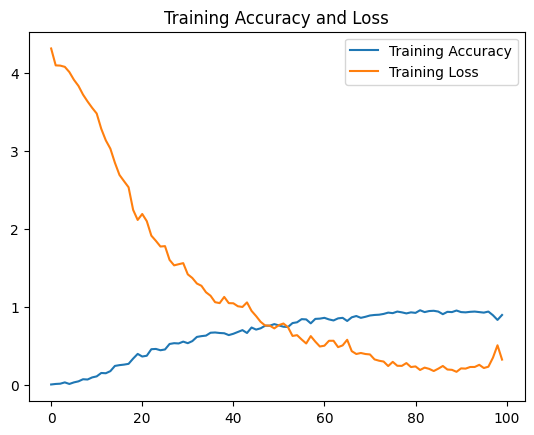

In [25]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')
plt.show()

In [26]:
model.save('fingerprint_model.h5')

In [2]:
import numpy as np
from PIL import Image
from keras.models import load_model

ai_model = load_model('fingerprint_model.h5')

image_path = "fingerprint_dataset\\015\\Ashuthosh_page-0002.jpg"

image = Image.open(image_path)
print(image)


image = image.resize((90,90))
image = image.convert("L")
image_array = np.array(image)

image_array = np.expand_dims(image_array, axis=0)
image_array = image_array.astype('float32') / 255.0
image_array.shape

result = ai_model.predict(image_array)

print(result)
result = np.argmax(result)
dict = {0: '001', 1: '002', 2: '003', 3: '004', 4: '005', 5: '006', 6: '007', 7: '008', 8: '009', 9: '010', 10: '011', 
         11: '012', 12: '014', 13: '015', 14: '016', 15: '017', 16: '018', 17: '019', 18: '020', 19: '021', 20: '022',
           21: '023', 22: '025', 23: '026', 24: '027', 25: '028', 26: '029', 27: '032', 28: '033', 29: '034', 30: '035',
             31: '037', 32: '038', 33: '039', 34: '040', 35: '041', 36: '042', 37: '043', 38: '045', 39: '046', 40: '047',
               41: '048', 42: '049', 43: '050', 44: '051', 45: '052', 46: '053', 47: '054', 48: '056', 49: '057', 50: '058', 
               51: '060', 52: '062', 53: '063', 54: '064', 55: '065', 56: '066', 57: '067', 58: '068', 59: '069'}

if result in dict:
    result = dict[result]
print(f"Predicted fingerprint is of ROLL NO : {result}")

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1275x1006 at 0x236264DDB90>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
[[3.78092664e-05 1.27996030e-12 3.56860369e-07 2.23614625e-05
  3.55361696e-09 1.19069298e-07 2.45867826e-10 1.23131982e-09
  4.98758815e-03 2.46835103e-08 1.99344488e-08 1.98537521e-07
  4.57262228e-09 3.35245090e-07 1.06991103e-10 8.24291510e-06
  1.13390318e-10 3.96934411e-07 7.84878793e-08 3.75583321e-02
  7.85476800e-07 9.09414837e-08 3.05679637e-09 2.43484305e-06
  2.20320453e-05 1.46432724e-02 1.54717669e-01 5.68459299e-12
  1.37510628e-10 8.14303594e-16 1.03341836e-12 4.78976386e-17
  3.10415261e-20 4.30549176e-16 1.35830531e-11 1.24696697e-07
  1.06014684e-03 2.81302981e-09 6.99088287e-06 3.51629170e-09
  9.66636344e-06 3.25376332e-01 1.93466604e-01 9.95474693e-07
  1.93061144e-03 6.02474320e-04 2.46181429e-07 4.65111202e-03
  1.05962170e-06 2.05469187e-05 1.23203179e-04 3.81871505e-05
  1.70130166e-09 4.74124972e-05 2.65490216e-05 2.60033578e-01
  6.929989